## Imports


In [4]:
import csv
import re

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


## Activity 1:

Generate a 400x300 24-bit colour image (with randomly assigned values, each of which is a randomly assigned value), display, save as a file, and make sure that it can be read back again.


Displaying the original randomly generated image: 


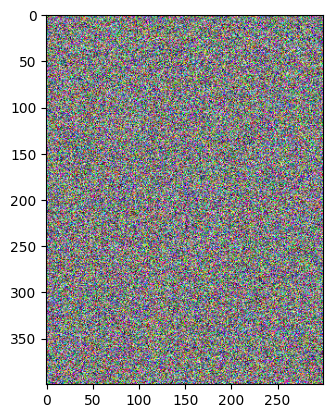

Reopening and displaying the randomly generated image saved as PNG: 


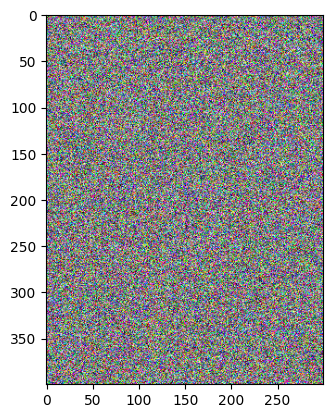

In [5]:
# Generate the array of 400 rows, each row with 300 values, each value being a 3 element list of random ints in the range [0, 255]
rand_arr = np.random.randint(0, high=255, size=(400, 300, 3), dtype=np.uint8)

# Display Image
print("Displaying the original randomly generated image: ")
plt.imshow(rand_arr, vmin=0, vmax=255)
plt.show()

# Save as png file
mpimg.imsave("output/rand_img.png", rand_arr)

# Ensure it can be read back again
saved_rand_img = mpimg.imread("output/rand_img.png")
print("Reopening and displaying the randomly generated image saved as PNG: ")
plt.imshow(saved_rand_img, vmin=0, vmax=255)
plt.show()


## Activity 2:

Read a saved image (e.g., c_small.png), create its gray-scale version, save it as a new image, and display it.


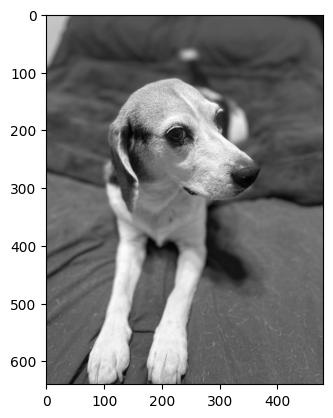

In [6]:
try:
    # Open image and convert it to grayscale
    img = mpimg.imread("given_images/c_small.png")
    gray_arr = np.mean(img, axis=2)

    # Save it as a new png
    mpimg.imsave("output/c_small_grayscale.png", gray_arr, cmap="gray")

    # Display the newly saved image in notebook
    gray_img = mpimg.imread("output/c_small_grayscale.png")
    plt.imshow(gray_img, cmap="gray")
    plt.show()

except FileNotFoundError:
    print("Could not find the file!")


## Activity 3:

Save image data as CSV files.


In [7]:
def create_csv(f_name, img_arr):
    with open(f_name, "w", encoding="utf-8") as f:
        w = csv.writer(f)
        w.writerows(img_arr)
    print(f"Successfully saved '{f_name}'")


# Save randomly generated image as CSV
create_csv("output/rand_img.csv", rand_arr)

# Save greyscaled image as CSV
create_csv("output/c_small_grayscale.csv", gray_arr)


Successfully saved 'output/rand_img.csv'
Successfully saved 'output/c_small_grayscale.csv'


# Recreating the images from CSV

These steps are added in light of the clarification post on brightspace. They demonstrate that the CSV's "c_small_grayscale.csv" and "rand_img.csv" can be opened and parsed to recreate the original image arrays and therefore images.


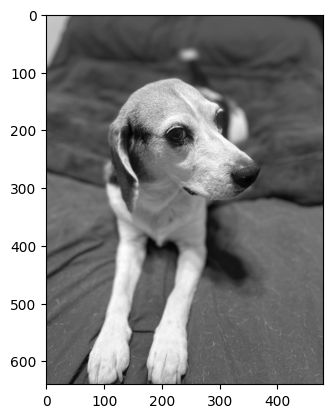

In [8]:
def parse_float_csv_to_array(f_name):
    with open(f_name, "r", encoding="utf-8") as f:
        reader = csv.reader(f)
        data = list(reader)

    return np.array(data, dtype=np.float32)


# Open the CSV data for the greyscaled dog image and display it
parsed_gray_arr = parse_float_csv_to_array("output/c_small_grayscale.csv")
plt.imshow(parsed_gray_arr, cmap="gray")
plt.show()


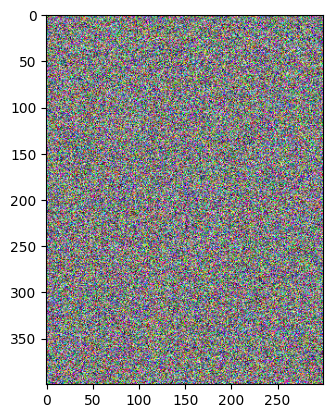

In [9]:
def parse_numpy_csv_to_array(file_name):
    with open(file_name, "r", encoding="utf-8") as f:
        reader = csv.reader(f)
        data = list(reader)

    parsed_data = []
    for row in data:
        parsed_row = []
        for pixel in row:
            RGB_vals = re.findall(r"\d+", pixel)
            parsed_row.append(RGB_vals)
        parsed_data.append(parsed_row)

    return np.array(parsed_data, dtype=np.uint8)


# Open the CSV data for the randomly generated image and display it
parsed_rand_arr = parse_numpy_csv_to_array("output/rand_img.csv")
plt.imshow(parsed_rand_arr, vmin=0, vmax=255)
plt.show()